# Algorithms Exercise 1

## Imports

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [53]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    terms = []
    for line in s.splitlines():
        terms.extend(line.split(' '))
    terms = [''.join(filter(lambda z: z not in punctuation, word)) for word in terms]
    if isinstance(stop_words, str):
        stop_words = stop_words.split(' ')
    if stop_words is not None:
        terms = [word for word in terms if word not in stop_words]
    terms = [word.lower() for word in terms if word]
    return terms

In [54]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""
assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [61]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    wc = {}
    for n in data:
        if n in wc:
            wc[n] = wc[n]+1
        else:
            wc[n] = 1
    return wc

In [62]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [65]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    return list(sorted(wc.items(), key=lambda x: x[1], reverse=True))

In [66]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [68]:
with open('mobydick_chapter1.txt') as md:
    rawtext = md.read()

wl = tokenize(rawtext, stop_words='the of and a to in is it that as')
wc = count_words(wl)
swc = sort_word_counts(wc)

In [69]:
assert swc[0]==('i',43)
assert len(swc)==848

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

TypeError: 'function' object is not subscriptable

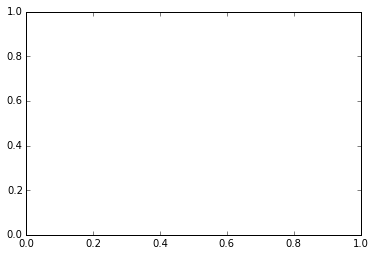

In [70]:
plt.hist(tokenize, swc, 'do')

In [ ]:
assert True # use this for grading the dotplot